Your code sample should aim to accomplish the following tasks:
- Given a set of multiple connected linestrings, write a Python script that splits each linestring every 30 metres, and adds a point at each location where the line has been split.
- Information should be stored for each point that indicates which linestrings it intersects.
- Finally, the script should return the projection of the linestring and point datasets, the total length of all linestrings, and how many points have been created.

In [9]:
import geopandas as gpd
import matplotlib as plt

In [10]:
lines = gpd.read_file("linestrings.gpkg")

In [ ]:
def mark_line_every_x(lines, x):
    loc = []
    n_locs = len(loc)
    proj = lines.crs
    


In [15]:
proj = lines.crs

<Axes: >

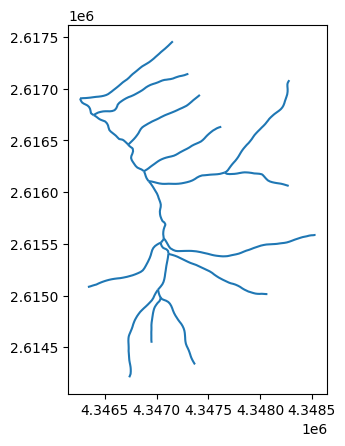

In [11]:
lines.plot()

In [13]:
lines.head()

,id,aoi_id,ef_type,ef_subtype,rank,length,rivernameid1,rivernameid2,geometry
0,a8bff057-b883-4ab2-8589-74761cfce177,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,78.133038,NaN,NaN,"LINESTRING (4347036.991 2614983.555, 4347028.6..."
1,01c3f93f-c09d-4fc6-a4c6-86805c6cd93f,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,227.358308,NaN,NaN,"LINESTRING (4346392.550 2616744.063, 4346386.4..."
2,215ee6ba-7b61-4fad-951f-ea0f82b06ccc,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,878.815271,NaN,NaN,"LINESTRING (4347418.685 2616940.081, 4347404.4..."
3,25529fe0-fb53-416e-bcdf-d844cef2d756,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,672.702038,NaN,NaN,"LINESTRING (4348277.557 2616059.380, 4348270.2..."
4,500f3f1e-5207-4a56-a79f-0e3dd6f6e17d,57d17da0-8b6f-4e43-a0b7-02e91ff9adc6,1,10,1,769.655102,NaN,NaN,"LINESTRING (4347657.113 2616188.980, 4347655.7..."
